In [47]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [96]:
# Interval = [a,b]
a = 0
b = 1
Nplots = 1025 # 2^10 + 1, 1/2^10 size interval each, number of points where I want to plot
N = 3 # degree of the polinomial space

In [97]:
x = linspace(a, b, Nplots)
q = linspace(a,b, N) # Points of interpolation
print(x.shape, q.shape)

(1025,) (3,)


In [98]:
# The function takes a function as a parameter and returns the plot of the points of interpolation and the function
def plot_function(f, plot_points=x, interpolation_points=q):
    plot(interpolation_points, f(interpolation_points), 'or') # or stands for red circles
    plot(plot_points, f(plot_points))

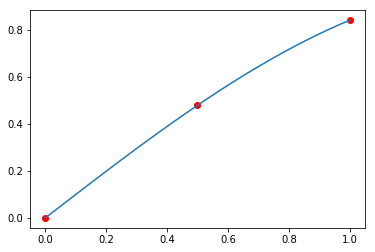

In [99]:
plot_function(sin)

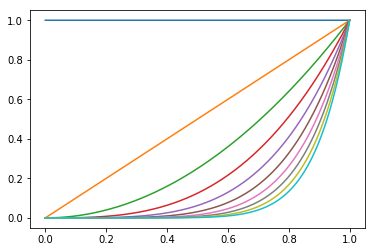

In [100]:
# Increasing the power of the function make them look more and more similar to each other
# The j-th column in the Lagrangian Matrix are going to be more and more similar to each other,
# making the matrix ill-conditioned
for i in range(10):
    plot(x, x**i)

In [101]:
B = zeros((N,N))
print(B)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [102]:
#Fill B with vj evaluated at qi where vj is the function evaluation 

In [103]:
for i in range(N):
    B[:,i] = q**(i)
print(B)

[[1.   0.   0.  ]
 [1.   0.5  0.25]
 [1.   1.   1.  ]]


In [104]:
#Same but faster than
#for i in range(N):
#    for j in range(N):
#        B[i,j] = q[i]**j

For the N = 5 case

Broadcasting between $\begin{bmatrix} 0 \\ 0.25 \\ 0.50 \\ 0.75 \\ 1 \end{bmatrix}$ and power vector $\begin{bmatrix} 0 & 1 & 2 & 3 & 4\end{bmatrix} = 
\begin{bmatrix}
    0^{0} & 0^{1} & 0^{2} & 0^{3} & 0^{4} \\
    0.25^{0} & 0.25^{1} & 0.25^{2} & 0.25^{3} & 0.25^{4} \\
    0.50^{0} & 0.5^{1} & 0.5^{2} & 0.5^{3} & 0.5^{4} \\
    0.75^{0} & 0.75^{1} & 0.75^{2} & 0.75^{3} & 0.75^{4} \\
    1^{0} & 1^{1} & 1^{2} & 1^{3} & 1^{4} \\
\end{bmatrix}$ 

In [105]:
#right way to write it in Python with numpy
B = q.reshape((N,1))**arange(N)
print(B)

[[1.   0.   0.  ]
 [1.   0.5  0.25]
 [1.   1.   1.  ]]


In [115]:
I = arange(N)

In [107]:
c = inv(B)

In [108]:
cond(B)

15.099657722502098

Multiplying the vector of all the points that define our function (x in the example, 1025) by the exposants (N in the example, 3). We get a matrix where a row represent all the powers of a single point

In [118]:
Xvec = x.reshape((-1, 1)) # A vector of all the points of x
Xvec = Xvec**I 

In [119]:
Xvec.shape

(1025, 3)

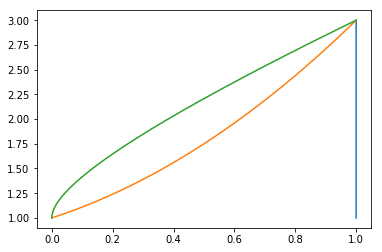

In [152]:
# Plot 1 + 2*x + 3*x^2
p = array([1, 1, 1])
plot(Xvec, Xvec.dot(p))

In [153]:
def myfun(x):
    return sin(2*pi*x)

In [154]:
# Compute the polynomial that interpolates myfun on q

p = inv(B).dot(myfun(q))
p

ValueError: shapes (3,3) and (5,) not aligned: 3 (dim 1) != 5 (dim 0)

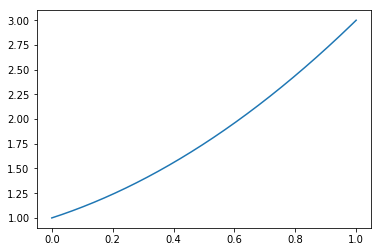

In [155]:
plot(x, Xvec.dot(p))

In [156]:
def interpolation(fun, q, x):
    """
    Returns the polynomial interpolation of fun at 
    the points q, evaluated at the points x.

    you can plot this by calling plot(x, interpolation(myfun, q, x))
    """
    N = len(q)
    I = arange(N)
    q_vec = q.reshape((-1,1)) # Reshapes q to be a value vector
    x_vec = x.reshape((-1,1))
    B = q_vec**I
    V = x_vec**I # Contain the basis function evaluated at x - V_{i}(x)
    p = V.dot(inv(B).dot(fun(q))) # Vij dot Bij dot func(xj)
    return p

In [157]:
myf = lambda x : 1./(1 + 50*(x - .5)**2)

# Same as writing

#def myf:
#    return 1./(1 + 50*(x - .5)**2)

In [158]:
q = linspace(0,1,15)
y = interpolation(myf, q, x)

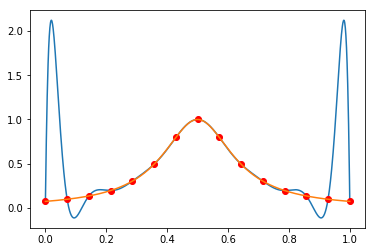

In [159]:
plot(x, y)
plot(q, myf(q), 'ro')
plot(x, myf(x))

In [160]:
def lagrange_basis(q, x):
    """
    Returns the Lagrange basis function evaluated at the points x.

    you can plot this by calling plot(x, interpolation(myfun, q, x))
    """
    N = len(q)
    I = arange(N)
    q_vec = q.reshape((-1,1)) # Reshapes q to be a value vector
    x_vec = x.reshape((-1,1))
    B = q_vec**I
    V = x_vec**I # Contain the basis function evaluated at x - V_{i}(x)
    p = V.dot(inv(B)) # Since it has the identity matrix, the inverse of B times the power of basis (delta)
    return p

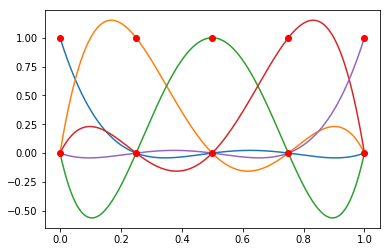

In [161]:
# 1 at a point, 0 at the others
q = linspace(0,1,5)
L = lagrange_basis(q, x)
_ = plot(x, L)
_ = plot(q, 0*q+1, 'ro')
_ = plot(q, 0*q, 'ro')

**The Jupyter Notebook provided contains a more efficient way of computing the Lagrange basis**